In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                        
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Users/jahnavi/Desktop/python/time series/Electric_Production.csv")

In [3]:
data.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [4]:
data.tail(35)

,DATE,IPG2211A2N
362,3/1/2015,104.4706
363,4/1/2015,89.7461
364,5/1/2015,91.0930
365,6/1/2015,102.6495
366,7/1/2015,111.6354
367,8/1/2015,110.5925
368,9/1/2015,101.9204
369,10/1/2015,91.5959
370,11/1/2015,93.0628
371,12/1/2015,103.2203


In [5]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [6]:
data.index= data['DATE']
data = data.drop(columns=['DATE'],axis=1)
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [7]:
data =data.rename(columns={'IPG2211A2N':'electrical_production'},index={'DATE':'date'})

In [8]:
data.describe()

,electrical_production
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [9]:
data.shape

(397, 1)

In [10]:
data.isnull().sum()

electrical_production    0
dtype: int64

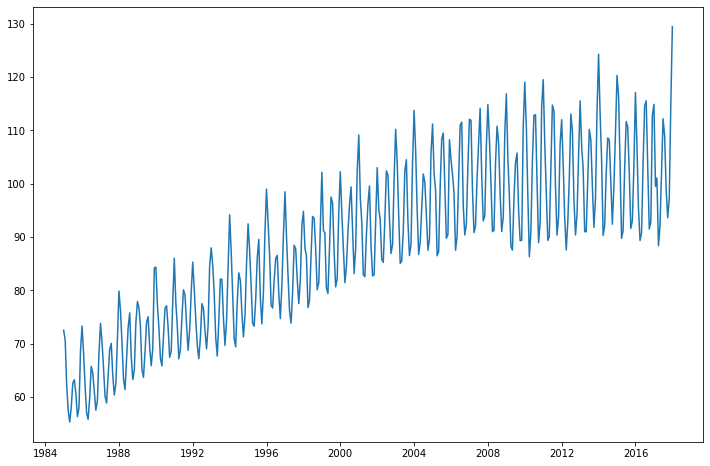

In [11]:
plt.figure(figsize=(12,8))
plt.plot(data['electrical_production'])

In [12]:
data['electrical_production'].unique().sum()

35272.345400000006

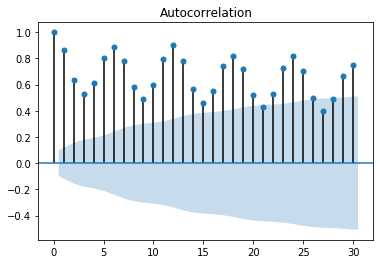

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf1 = plot_acf(data['electrical_production'], lags=30)

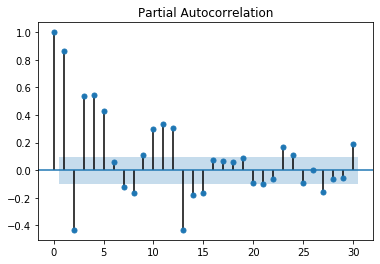

In [14]:
plot_pacf1 = plot_pacf(data['electrical_production'], lags=30)

In [15]:
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(data.electrical_production,order=(1,0,1))
model = arima.fit()
print(model.summary())

                                ARMA Model Results                               
Dep. Variable:     electrical_production   No. Observations:                  397
Model:                        ARMA(1, 1)   Log Likelihood               -1292.695
Method:                          css-mle   S.D. of innovations              6.261
Date:                   Sat, 27 Jun 2020   AIC                           2593.391
Time:                           09:54:17   BIC                           2609.327
Sample:                       01-01-1985   HQIC                          2599.704
                            - 01-01-2018                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          89.1177      2.384     37.383      0.000      84.445      93.790
ar.L1.electrical_production     0.7887      0.033     24

<Figure size 720x720 with 0 Axes>

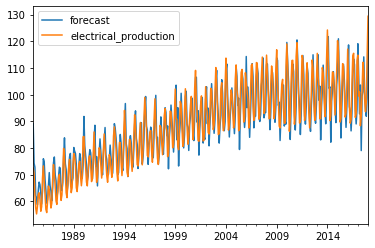

In [16]:
plt.figure(figsize=(10,10))
model.plot_predict();

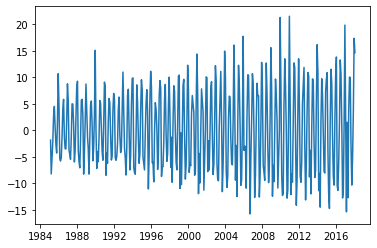

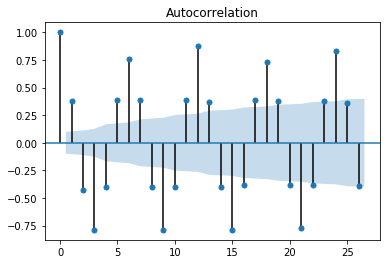

In [17]:
#data['electrical_production_diff'] = data.electrical_production - data.electrical_production.shift(1)
#data.head()
plt.plot(data.electrical_production.diff().dropna())
plot_acf(data.electrical_production.diff().dropna());

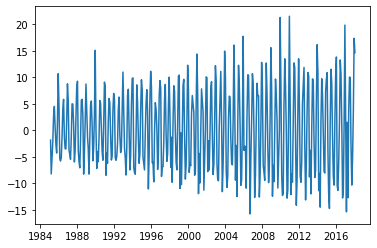

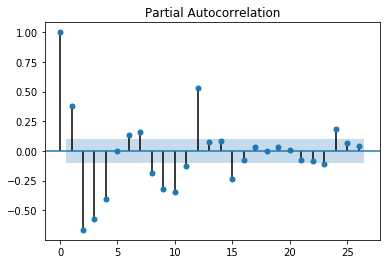

In [18]:
plt.plot(data.electrical_production.diff().dropna())
plot_pacf(data.electrical_production.diff().dropna());

In [19]:
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(data.electrical_production,order=(1,1,1))
model = arima.fit()
print(model.summary())

                                ARIMA Model Results                                
Dep. Variable:     D.electrical_production   No. Observations:                  396
Model:                      ARIMA(1, 1, 1)   Log Likelihood               -1327.994
Method:                            css-mle   S.D. of innovations              6.904
Date:                     Sat, 27 Jun 2020   AIC                           2663.989
Time:                             09:54:21   BIC                           2679.914
Sample:                         02-01-1985   HQIC                          2670.298
                              - 01-01-2018                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.1108      0.020      5.607      0.000       0.072       0.149
ar.L1.D.electrical_production     

In [20]:
data.columns

Index(['electrical_production'], dtype='object')

In [21]:
train_set = data[0:365]
test_set = data[365:]

In [22]:
arima = ARIMA(train_set,order=(1,1,1))
model = arima.fit()
print(model.summary())

                                ARIMA Model Results                                
Dep. Variable:     D.electrical_production   No. Observations:                  364
Model:                      ARIMA(1, 1, 1)   Log Likelihood               -1208.944
Method:                            css-mle   S.D. of innovations              6.683
Date:                     Sat, 27 Jun 2020   AIC                           2425.888
Time:                             09:54:21   BIC                           2441.477
Sample:                         02-01-1985   HQIC                          2432.084
                              - 05-01-2015                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.1164      0.019      6.198      0.000       0.080       0.153
ar.L1.D.electrical_production     

In [23]:
fcast,se,confidencebands = model.forecast(32,alpha=0.01)

In [24]:
pred_set = pd.DataFrame(data=fcast,columns=['Value']) 
pred_set.index = test_set.index
pred_set.tail()

,Value
DATE,
2017-09-01,109.515408
2017-10-01,109.631840
2017-11-01,109.748272
2017-12-01,109.864703
2018-01-01,109.981135


Text(0, 0.5, 'Electricity production')

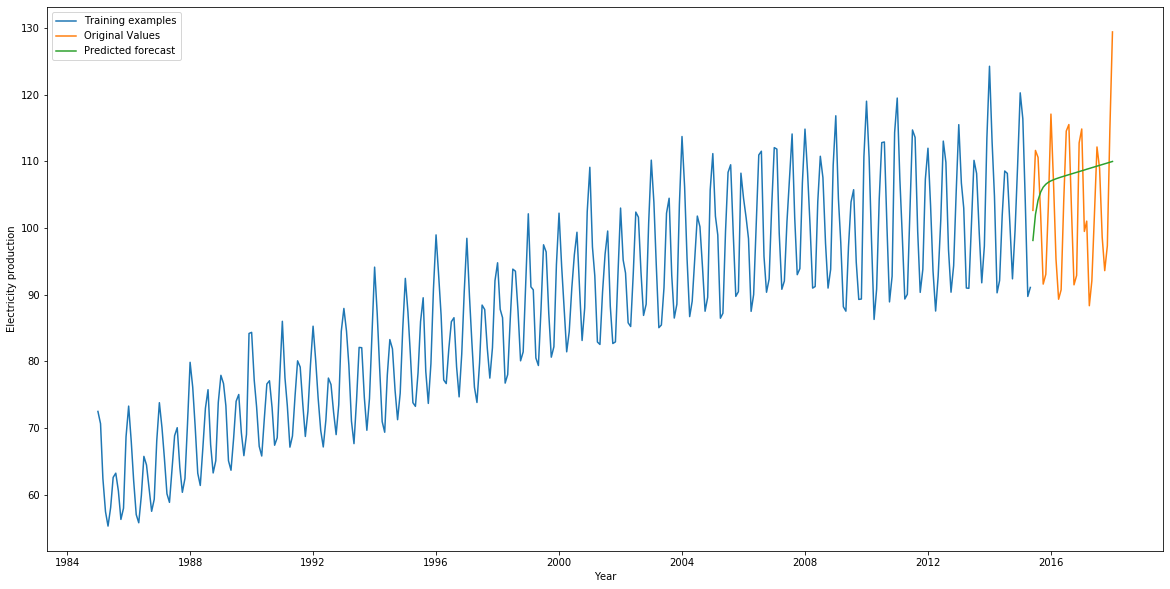

In [25]:
plt.figure(figsize=(20,10))
plt.plot(train_set,label='Training examples')
plt.plot(test_set,label='Original Values')
plt.plot(pred_set,label='Predicted forecast')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Electricity production')

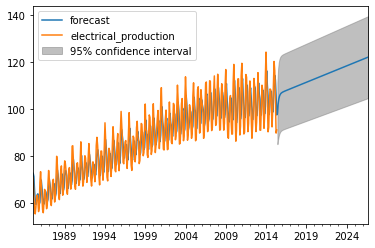

In [26]:
model.plot_predict(1,500);